# Box plots with custom fill colors [#217](https://github.com/lukelbd/proplot/issues/217)
conda env: `proplot_v0.6.4_dev` (installed by fork proplot)

-> clone the repository and run `pip install -e .` inside the proplot folder (in `~/github/proplot`)

Try to fix the issue by modifying the code.

In [1]:
%load_ext autoreload
%autoreload 2

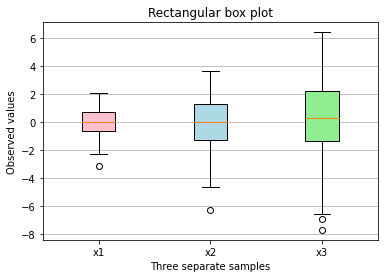

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, ax = plt.subplots()

# rectangular box plot
bplot = ax.boxplot(all_data, patch_artist=True, labels=labels)  
ax.set_title('Rectangular box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)
ax.set_xlabel('Three separate samples')
ax.set_ylabel('Observed values')

plt.show()

/home/lalandmi/github/proplot/proplot/axes/plot.py:582: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)


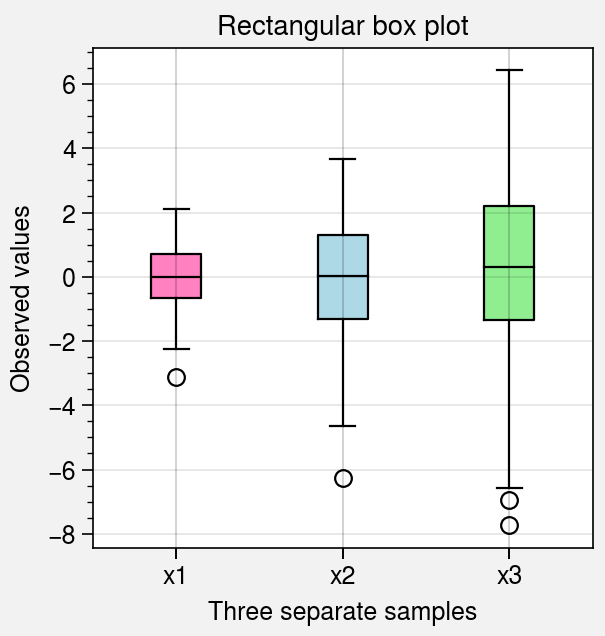

In [4]:
import proplot as plot
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

# Convert to pandas dataframe
df = pd.DataFrame(None, columns=pd.Index(labels, name='xlabel'))
for i, data in enumerate(all_data):
    df[labels[i]] = data

fig, ax = plot.subplots()

# rectangular box plot
bplot = ax.boxplot(df)  
# bplot = ax.boxplot(df, fillcolor=['pink', 'lightblue', 'lightgreen'])  
ax.set_title('Rectangular box plot')

#####################################################
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for artist, color in zip(bplot['boxes'], colors):
    patch = mpatches.PathPatch(artist.get_path(), color=color)
    ax.add_artist(patch)
#####################################################

# adding horizontal grid lines
ax.format(grid=True, xlabel='Three separate samples', ylabel='Observed values')

In [ ]:
def boxplot_wrapper(
    self, func, *args,
    color='k', fill=True, fillcolor=None, fillalpha=0.7,
    lw=None, linewidth=None, orientation=None,
    marker=None, markersize=None,
    boxcolor=None, boxlw=None,
    capcolor=None, caplw=None,
    meancolor=None, meanlw=None,
    mediancolor=None, medianlw=None,
    whiskercolor=None, whiskerlw=None,
    fliercolor=None, flierlw=None,
    **kwargs
):

In [4]:
def _not_none(*args, default=None, **kwargs):
    """
    Return the first non-``None`` value. This is used with keyword arg aliases and
    for setting default values. Use `kwargs` to issue warnings when multiple
    non-``None`` values were passed. Use `args` to just ignore extra values.
    """
    first = default
    if args and kwargs:
        raise ValueError('_not_none can only be used with args or kwargs.')
    elif args:
        for arg in args:
            if arg is not None:
                first = arg
                break
    elif kwargs:
        for name, arg in list(kwargs.items()):
            if arg is not None:
                first = arg
                break
        kwargs = {name: arg for name, arg in kwargs.items() if arg is not None}
        if len(kwargs) > 1:
            warnings._warn_proplot(
                f'Got conflicting or duplicate keyword args: {kwargs}. '
                'Using the first one.'
            )
    return first


In [8]:
_not_none(None, ['aze', 'aze'])

['aze', 'aze']

In [3]:
a = ['x1', 'x2', 'x3']
a

['x1', 'x2', 'x3']

In [27]:
b = []
for i in a:
    b.extend([i, i])

In [28]:
b

['x1', 'x1', 'x2', 'x2', 'x3', 'x3']

In [20]:
b = [[aze]*2 for aze in a]
[item for sublist in [[aze]*2 for aze in a] for item in sublist]

['x1', 'x1', 'x2', 'x2', 'x3', 'x3']

/home/lalandmi/github/proplot/proplot/axes/plot.py:582: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/lalandmi/github/proplot/proplot/axes/plot.py:582: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)


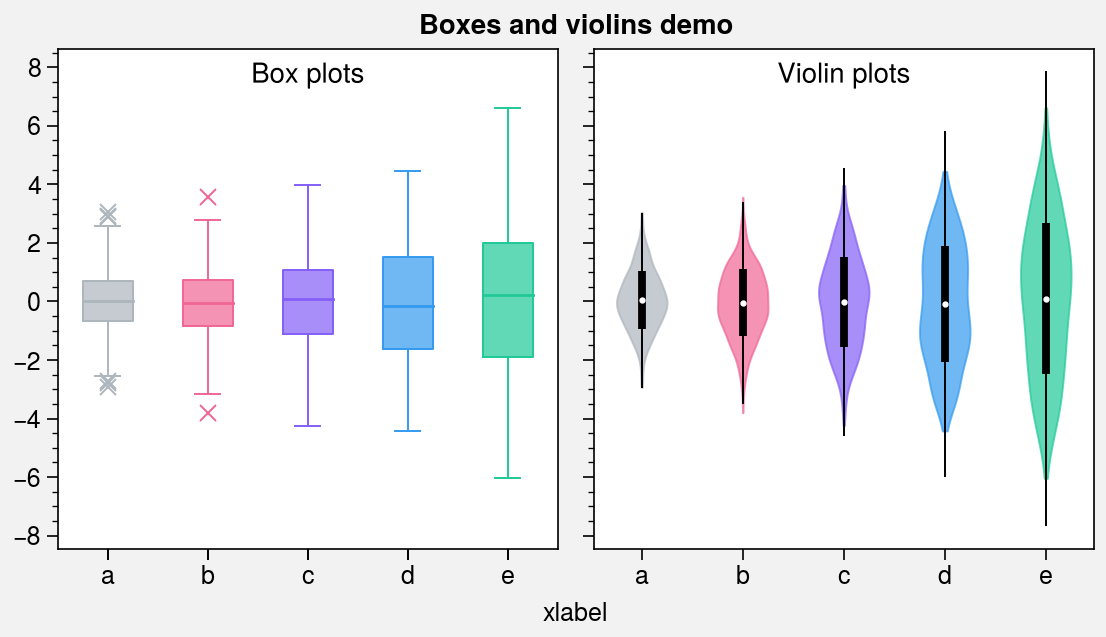

In [3]:
import proplot as plot
import numpy as np
import pandas as pd

# Generate sample data
N = 500
state = np.random.RandomState(51423)
data = state.normal(size=(N, 5)) + 2 * (state.rand(N, 5) - 0.5) * np.arange(5)
data = pd.DataFrame(
    data,
    columns=pd.Index(['a', 'b', 'c', 'd', 'e'], name='xlabel')
)

# Generate figure
fig, axs = plot.subplots(ncols=2, axwidth=2.5)
axs.format(grid=False, suptitle='Boxes and violins demo')

# Box plots
colors = ['gray5', 'pink5', 'violet5', 'blue5', 'teal5']
ax = axs[0]
obj1 = ax.boxplot(
    data, lw=0.7, marker='x', fillcolor=colors, medianlw=1, mediancolor=colors, 
    whiskercolor=colors, capcolor=colors, fliercolor=colors, boxcolor=colors
)
ax.format(title='Box plots', titleloc='uc')

# Violin plots
ax = axs[1]
obj2 = ax.violinplot(
    data, lw=0.7, fillcolor=colors, edgecolor=colors,
    points=500, bw_method=0.3, means=True
)

ax.format(title='Violin plots', titleloc='uc')

fig.save('boxes_violins_demo.jpg', dpi=300)

/home/lalandmi/github/proplot/proplot/axes/plot.py:582: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)


0
boxes
1
boxes
2
boxes
0
caps
1
caps
2
caps
3
caps
4
caps
5
caps
0
whiskers
1
whiskers
2
whiskers
3
whiskers
4
whiskers
5
whiskers
0
medians
1
medians
2
medians
0
fliers
1
fliers
2
fliers


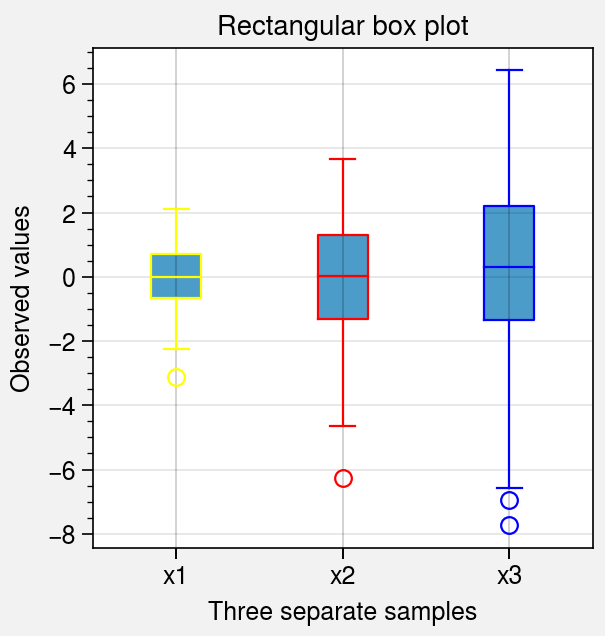

In [12]:
import proplot as plot
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

# Convert to pandas dataframe
df = pd.DataFrame(None, columns=pd.Index(labels, name='xlabel'))
for i, data in enumerate(all_data):
    df[labels[i]] = data

fig, ax = plot.subplots()

# rectangular box plot
# bplot = ax.boxplot(df, 
#                    fillcolor=['red', 'blue', 'yellow']
#                   )

bplot = ax.boxplot(
    df, 
    color=['yellow', 'red', 'blue'], 
#     color=['red', 'blue', 'yellow', 'black', 'orange', 'purple'], 
    fill=True, 
#     fillcolor=None, 
#     fillcolor=['red', 'blue', 'yellow'],
#     fillcolor='red',
    fillalpha=0.7,
    lw=None, 
    linewidth=None, 
    orientation=None,
    marker=None, markersize=None,
    
#     boxcolor=['yellow', 'red', 'blue'], 
#     boxcolor='red', 
    
    boxlw=None,
    
#     capcolor=['yellow', 'red', 'blue'], 
#     capcolor='red', 
    
    caplw=None,
    
#     meancolor='red', 
    
    meanlw=None,
    
#     mediancolor=['yellow', 'red', 'white'], 
    
    medianlw=None,
    
#     whiskercolor=['blue', 'red', 'black'], 
    
    whiskerlw=None,
    
#     fliercolor=['blue', 'red', 'black'], 
    
    flierlw=None,
)


# bplot = ax.boxplot(df, fillcolor=['pink', 'lightblue', 'lightgreen'])  


ax.set_title('Rectangular box plot')

# adding horizontal grid lines
ax.format(grid=True, xlabel='Three separate samples', ylabel='Observed values')

In [22]:
fillcolor = 'red'
type(fillcolor)

str

In [18]:
fillcolor = ['red', 'blue']
type(fillcolor)

list

In [12]:
isinstance(fillcolor, str)

True

In [23]:
if isinstance(fillcolor, str):
    fillcolor = [fillcolor]*3
fillcolor

In [24]:
fillcolor

['red', 'red', 'red']